In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.subplots import make_subplots

### 2018 - 2019 - 2020

In [2]:
#df_og = pd.read_csv('./Data/Export Febrero + Marzo (12.3).csv', sep=';', decimal=',')
df_og = pd.read_csv('./Data/orders-export-2021-03-16-16-13-22.csv', sep=';', decimal=',')

C:\Users\Angela\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (26,34) have mixed types.Specify dtype option on import or set low_memory=False.



In [19]:
df_og.isna().sum()

Order_ID                0
Order                   0
Invoices            18268
Credit_notes        80768
Added                   0
                    ...  
Customer                0
Comment             61653
Memo                61544
Price_payment           0
Shipping_company    79675
Length: 61, dtype: int64

In [8]:
df_og.columns

Index(['Order_ID', 'Order', 'Invoices', 'Credit_notes', 'Added', 'Status',
       'Custom_status', 'Payment', 'Shipping', 'Price_total', 'Price_total_ex',
       'Price_vat', 'Price_cost', 'Price_shipping', 'Weight', 'Volume',
       'Colli', 'Company', 'Vat', 'Firstname', 'Lastname', 'Phone', 'Mobile',
       'E-mail', 'Attn', 'Streetname', 'Second_address_line', 'Number',
       'Extension', 'Zipcode', 'City', 'Region', 'Country', 'Invoice_street',
       'Invoice_street_2', 'Invoice_housenumber', 'Invoice_housenumber_ext',
       'Invoice_zipcode', 'Invoice_city', 'Invoice_region', 'Invoice_country',
       'Quantity', 'Product_price', 'Product_price_cost', 'Product_weight',
       'Product_volume', 'Product_colli', 'Product_supplier', 'Product_brand',
       'Product_title', 'Product_variant', 'Product_article_code',
       'Product_EAN', 'Product_SKU', 'Discount_code', 'Discount_price',
       'Customer', 'Comment', 'Memo', 'Price_payment', 'Shipping_company'],
      dtype='object

In [4]:
df_og.shape

(81438, 61)

In [5]:
df_og.Status.unique()

array(['Cancelled', 'Paid, shipped', 'Not paid, not shipped',
       'Paid, not shipped', 'Not paid, shipped'], dtype=object)

In [9]:
%run ./cohorts_pipeline_woof_v3.py

In [10]:
df = df_cleaning(df_og)

c:\Users\Angela\Documents\Python Scripts\WOOOF\cohorts_pipeline_woof_v3.py:30: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [20]:
df.isna().sum()

Customer_ID             0
Order                   0
Order_ID                0
Status                  0
Payment                 0
ValueNOVAT          10103
E-mail                  0
Firstname               0
Lastname                0
Product_title           0
Creation_Date           0
First_Order             0
First_Order_YM          0
Creation_Date_YM        0
Customer_Type           0
Payment_Type            0
Year                    0
Week                    0
Year_Week               0
dtype: int64

In [33]:
df = df.fillna(0)

In [34]:
df['Creation_Date_YM'] = df['Creation_Date'].apply(lambda x: x.strftime('%Y-%m'))

In [35]:
summary_payment_type = df.groupby(['Creation_Date_YM','Payment_Type']).agg({'ValueNOVAT':pd.Series.sum, 'Order':pd.Series.nunique}).unstack(1)

In [36]:
summary_payment_type.columns = ['Amazon_TO','Webshop_TO','Amazon_TX','Webshop_TX']

In [37]:
summary_payment_type = summary_payment_type.astype(int)

In [38]:
summary_payment_type = summary_payment_type.reset_index()

In [39]:
summary_payment_type.to_clipboard(index=False)

In [40]:
summary_payment_type_cust_type = df.groupby(['Creation_Date_YM','Payment_Type','Customer_Type']).agg({'ValueNOVAT':pd.Series.sum, 'Order':pd.Series.nunique}).unstack([1,2]).fillna(0)

In [52]:
summary_payment_type_cust_type['AmazonTX_Ret']['2017-11'] = 0

In [55]:
summary_payment_type_cust_type.isna().sum()

AmazonTO_New     0
WebshopTO_New    0
WebshopTO_Ret    0
AmazonTO_Ret     0
AmazonTX_New     0
WebshopTX_New    0
WebshopTX_Ret    0
AmazonTX_Ret     0
dtype: int64

In [46]:
summary_payment_type_cust_type.columns = ['AmazonTO_New','WebshopTO_New','WebshopTO_Ret','AmazonTO_Ret','AmazonTX_New','WebshopTX_New','WebshopTX_Ret','AmazonTX_Ret']

In [54]:
summary_payment_type_cust_type = summary_payment_type_cust_type.astype(int)

In [56]:
summary_payment_type_cust_type = summary_payment_type_cust_type.reset_index()

In [57]:
#summary_payment_type_cust_type.to_clipboard(index=False)

In [58]:
summary = df[df.Creation_Date>='2019-01-01'].groupby('Creation_Date_YM').agg({'ValueNOVAT':pd.Series.sum, 'Order':pd.Series.nunique})

In [59]:
summary.columns = ['Revenue','Orders']

In [60]:
summary = summary.reset_index()

In [61]:
summary.head()

,Creation_Date_YM,Revenue,Orders
0,2019-01,93383.50,2013
1,2019-02,76812.34,1633
2,2019-03,78822.62,1637
3,2019-04,78788.87,1520
4,2019-05,78114.11,1605


In [ ]:
#summary.to_clipboard(index=False, decimal=",")

In [62]:
df_ws = df[df['Payment_Type']=='Webshop']
df_az = df[df['Payment_Type']=='Amazon']

In [25]:
transactions, reorder_rates = cohorts_pipeline(df)
transactions_ws, reorder_rates_ws = cohorts_pipeline(df_ws)
transactions_az, reorder_rates_az = cohorts_pipeline(df_az)

In [26]:
trans_week = df.groupby(['Year_Week','Customer_Type','Payment_Type']).agg({'Order':pd.Series.nunique}).unstack([1,2]).fillna(0).reset_index()

In [27]:
trans_week.columns = ['Year_Week','New_WS','New_AZ','Ret_WS','Ret_AZ']

In [28]:
test = df[(df.Creation_Date>='2020-01-01')].groupby(['Creation_Date','Customer_Type']).agg({'ValueNOVAT':pd.Series.sum}).reset_index()

In [29]:
test.columns = ['Creation_Date','Customer_Type','Revenue_EXVAT']

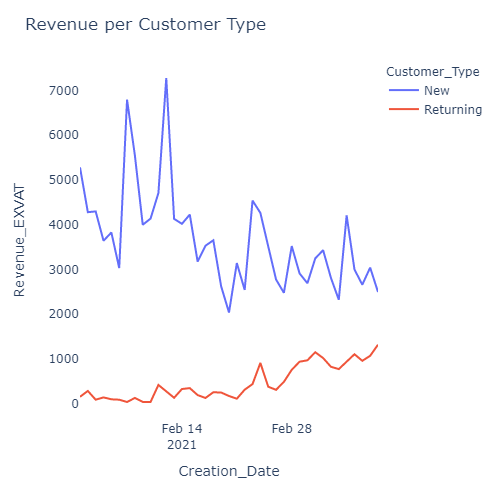

In [111]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500
pio.renderers.default = "png"

import plotly.express as px

fig = px.line(test, x="Creation_Date", y="Revenue_EXVAT", color='Customer_Type')
fig.update_layout({'title_text':'Revenue per Customer Type',
'plot_bgcolor': 'rgb(256, 256, 256)',
'paper_bgcolor': 'rgb(256, 256, 256)',
'height':600,
'showlegend':True
})
fig.show()

In [31]:
df['Duck'] = np.where(df['Product_title'].str.contains('NEU: WOOOF Ente - 15% Probier-Rabatt'),'Duck','No Duck')

In [32]:
df = df.sort_values(by='Creation_Date')

In [33]:
df['DaysDiff'] = df.groupby('E-mail')['Creation_Date'].diff().apply(lambda x: x.days).fillna(0)

In [34]:
df.head()

,Customer_ID,Order,Order_ID,Status,Payment,ValueNOVAT,E-mail,Firstname,Lastname,Product_title,...,First_Order,First_Order_YM,Creation_Date_YM,Customer_Type,Payment_Type,Year,Week,Year_Week,Duck,DaysDiff
0,113463987,DE_ORD66941,174997431,"Paid, shipped",Pay.nl - Sofortbanking,151.26,kerstintaeuber@arcor.de,Kerstin,Täuber,WOOOF High Energy,...,2021-02-01,2021-02,2021-02,New,Webshop,2021,5,2021-05,No Duck,0.0
95,124826363,DE_ORD67022,175073454,"Paid, shipped",Pay.nl - PayPal,26.12,dodo180881@googlemail.com,Doreen,Popp,WOOOF Regular,...,2021-02-01,2021-02,2021-02,New,Webshop,2021,5,2021-05,No Duck,0.0
94,131726813,DE_ORD67021,175072269,"Paid, shipped",Klarna DE - In 14 Tagen bezahlen,41.07,familiekawohl@web.de,Karin,Kawohl,WOOOF Regular,...,2021-02-01,2021-02,2021-02,New,Webshop,2021,5,2021-05,No Duck,0.0
93,86341904,DE_ORD67020,175071532,"Paid, shipped",Payment Amazon,47.33,1hnq6pqhftj8l29@marketplace.amazon.de,Tobias,Schütte,WOOOF High Energy,...,2021-02-01,2021-02,2021-02,New,Amazon,2021,5,2021-05,No Duck,0.0
92,122038693,DE_ORD67019,175071034,"Paid, shipped",Payment Amazon,45.19,tzpn8w4zfh9sbrq@marketplace.amazon.de,Markus,Schnabel,WOOOF Regular,...,2021-02-01,2021-02,2021-02,New,Amazon,2021,5,2021-05,No Duck,0.0


In [35]:
week_summary = df[df.Year>=2020].groupby(['Year_Week','Payment_Type']).agg({'ValueNOVAT':pd.Series.sum}).unstack(1).fillna(0)

In [36]:
week_summary = week_summary.astype(int).tail(12)

In [37]:
week_summary.columns = week_summary.columns.droplevel()

In [38]:
week_summary = week_summary.reset_index()

In [39]:
week_summary

Payment_Type,Year_Week,Amazon,Webshop
0,2021-05,6053,25947
1,2021-06,5259,29880
2,2021-07,5134,18661
3,2021-08,4564,22627
4,2021-09,5512,22670
5,2021-10,3760,11861


In [43]:
# writer = pd.ExcelWriter('../2020/Outputs/WOOOF_BI_2020_Week24.xlsx')

# transactions.to_excel(writer,'Trans_Full')
# reorder_rates.to_excel(writer,'RR_Full')
# transactions_az.to_excel(writer,'Trans_AZ')
# reorder_rates_az.to_excel(writer,'RR_AZ')
# transactions_ws.to_excel(writer,'Trans_WS')
# reorder_rates_ws.to_excel(writer,'RR_WS')
# trans_week.to_excel(writer,'Trans_Week')
# # weekly_roas.to_excel(writer,'ROAS_Week')
# # monthly_summary.to_excel(writer,'ROAS_Month')

# writer.save()

In [40]:
trans_week

,Year_Week,New_WS,New_AZ,Ret_WS,Ret_AZ
0,2021-05,130,490,3,17
1,2021-06,106,577,1,29
2,2021-07,108,346,2,31
3,2021-08,86,377,9,54
4,2021-09,101,325,26,104
5,2021-10,54,184,21,70


### Data Update

In [41]:
transactions = transactions.fillna(0)
transactions_ws = transactions_ws.fillna(0)
transactions_az = transactions_az.fillna(0)
trans_week = trans_week.fillna(0)

transactions = transactions.astype(int)
transactions_ws = transactions_ws.astype(int)
transactions_az = transactions_az.astype(int)
trans_week = trans_week.astype(str)

In [42]:
trans_week = trans_week[trans_week['Year_Week']>='2020-00']

In [43]:
trans_week = trans_week.tail(12)

In [49]:
#from gspread_pandas import Spread, Client

In [53]:
#wooof_sheet = Spread('WOOOF Weekly Detector v2')

In [44]:
reorder_rates = reorder_rates.astype(str)

In [45]:
reorder_rates = reorder_rates.apply(lambda x: x.str.replace('.',','))
reorder_rates = reorder_rates.apply(lambda x: x.str.replace('nan',''))

In [56]:
# Push Transactions
#wooof_sheet.df_to_sheet(transactions, index=True, sheet='DataDump_BE', start='A2', replace=False)
#wooof_sheet.df_to_sheet(transactions_ws, index=True, sheet='DataDump_BE', start='I2', replace=False)
#wooof_sheet.df_to_sheet(transactions_az, index=True, sheet='DataDump_BE', start='Q2', replace=False)
#wooof_sheet.df_to_sheet(week_summary, index=False, sheet='DataDump_BE', start='Y2', replace=False)
#wooof_sheet.df_to_sheet(trans_week, index=False, sheet='Users Weekly', start='A1', replace=False)
#wooof_sheet.df_to_sheet(reorder_rates, index=True, sheet='Cohorts', start='A1', replace=True)

In [57]:
#wooof_sheet.df_to_sheet(reorder_rates, index=True, sheet='Cohorts', start='A1', replace=True)

In [46]:
df.head()

,Customer_ID,Order,Order_ID,Status,Payment,ValueNOVAT,E-mail,Firstname,Lastname,Product_title,...,First_Order,First_Order_YM,Creation_Date_YM,Customer_Type,Payment_Type,Year,Week,Year_Week,Duck,DaysDiff
0,113463987,DE_ORD66941,174997431,"Paid, shipped",Pay.nl - Sofortbanking,151.26,kerstintaeuber@arcor.de,Kerstin,Täuber,WOOOF High Energy,...,2021-02-01,2021-02,2021-02,New,Webshop,2021,5,2021-05,No Duck,0.0
95,124826363,DE_ORD67022,175073454,"Paid, shipped",Pay.nl - PayPal,26.12,dodo180881@googlemail.com,Doreen,Popp,WOOOF Regular,...,2021-02-01,2021-02,2021-02,New,Webshop,2021,5,2021-05,No Duck,0.0
94,131726813,DE_ORD67021,175072269,"Paid, shipped",Klarna DE - In 14 Tagen bezahlen,41.07,familiekawohl@web.de,Karin,Kawohl,WOOOF Regular,...,2021-02-01,2021-02,2021-02,New,Webshop,2021,5,2021-05,No Duck,0.0
93,86341904,DE_ORD67020,175071532,"Paid, shipped",Payment Amazon,47.33,1hnq6pqhftj8l29@marketplace.amazon.de,Tobias,Schütte,WOOOF High Energy,...,2021-02-01,2021-02,2021-02,New,Amazon,2021,5,2021-05,No Duck,0.0
92,122038693,DE_ORD67019,175071034,"Paid, shipped",Payment Amazon,45.19,tzpn8w4zfh9sbrq@marketplace.amazon.de,Markus,Schnabel,WOOOF Regular,...,2021-02-01,2021-02,2021-02,New,Amazon,2021,5,2021-05,No Duck,0.0


# First Time Buyers

In [63]:
df.head()

,Customer_ID,Order,Order_ID,Status,Payment,ValueNOVAT,E-mail,Firstname,Lastname,Product_title,Creation_Date,First_Order,First_Order_YM,Creation_Date_YM,Customer_Type,Payment_Type,Year,Week,Year_Week
0,46400897,DE_ORD00031,58005182,"Paid, shipped",Pay.nl - Banküberweisung,23.78,sjaak@blids.nl,Yvonne,Zermin,WOOOF Regular,2017-11-17,2017-11-17,2017-11,2017-11,New,Webshop,2017,46,2017-46
1,46544999,DE_ORD00032,58314515,"Paid, shipped",Klarna DE - Klarna Rechnung.,24.71,yzermin@gmx.de,Yvonne,Zermin,WOOOF Regular,2017-11-21,2017-11-21,2017-11,2017-11,New,Webshop,2017,47,2017-47
2,47823566,DE_ORD00034,58356140,"Paid, shipped",Pay.nl - Sofortbanking,37.33,Patrickwerb@gmx.de,Patrick,Werb,WOOOF Regular,2017-11-21,2017-11-21,2017-11,2017-11,New,Webshop,2017,47,2017-47
3,47821025,DE_ORD00035,58357271,"Paid, shipped",Pay.nl - Sofortbanking,23.78,marona1985malibu@googlemail.com,Ramona,Tinnemeier,WOOOF Regular,2017-11-21,2017-11-21,2017-11,2017-11,New,Webshop,2017,47,2017-47
4,47820044,DE_ORD00039,58428260,"Paid, shipped",Pay.nl - PayPal,76.16,bernd-jendreck@t-online.de,Bernd,Jendreck,WOOOF Regular,2017-11-22,2017-11-22,2017-11,2017-11,New,Webshop,2017,47,2017-47


In [11]:
import datetime
now = datetime.datetime.now()

In [70]:
now

datetime.datetime(2021, 4, 5, 17, 54, 39, 777869)

In [71]:
now - df['First_Order']

0       1235 days 17:54:39.777869
1       1231 days 17:54:39.777869
2       1231 days 17:54:39.777869
3       1231 days 17:54:39.777869
4       1230 days 17:54:39.777869
                   ...           
77707    538 days 17:54:39.777869
77708    310 days 17:54:39.777869
77709    310 days 17:54:39.777869
77710    246 days 17:54:39.777869
77711    478 days 17:54:39.777869
Name: First_Order, Length: 77712, dtype: timedelta64[ns]

In [69]:
df[(now - df['First_Order'])<=pd.Timedelta(7,'D')].loc[:,['E-mail', 'Firstname', 'Lastname']]
# it doesn't show new customers because this data is older than 2 weeks...

,E-mail,Firstname,Lastname


In [65]:
new_customers = df[(now - df['First_Order'])<=pd.Timedelta(7,'D')].loc[:,['E-mail', 'Firstname', 'Lastname']]

In [66]:
new_customers = new_customers.drop_duplicates()

In [ ]:
#new_customers.to_csv('./Outputs/WOOOF_NewCustomers_{}.csv'.format(pd.datetime.today().strftime('%Y%m%d'), index=False))

In [68]:
new_customers.head()

,E-mail,Firstname,Lastname


## RFM

In [72]:
df.columns

Index(['Customer_ID', 'Order', 'Order_ID', 'Status', 'Payment', 'ValueNOVAT',
       'E-mail', 'Firstname', 'Lastname', 'Product_title', 'Creation_Date',
       'First_Order', 'First_Order_YM', 'Creation_Date_YM', 'Customer_Type',
       'Payment_Type', 'Year', 'Week', 'Year_Week'],
      dtype='object')

In [73]:
df_og.columns

Index(['Order_ID', 'Order', 'Invoices', 'Credit_notes', 'Added', 'Status',
       'Custom_status', 'Payment', 'Shipping', 'Price_total', 'Price_total_ex',
       'Price_vat', 'Price_cost', 'Price_shipping', 'Weight', 'Volume',
       'Colli', 'Company', 'Vat', 'Firstname', 'Lastname', 'Phone', 'Mobile',
       'E-mail', 'Attn', 'Streetname', 'Second_address_line', 'Number',
       'Extension', 'Zipcode', 'City', 'Region', 'Country', 'Invoice_street',
       'Invoice_street_2', 'Invoice_housenumber', 'Invoice_housenumber_ext',
       'Invoice_zipcode', 'Invoice_city', 'Invoice_region', 'Invoice_country',
       'Quantity', 'Product_price', 'Product_price_cost', 'Product_weight',
       'Product_volume', 'Product_colli', 'Product_supplier', 'Product_brand',
       'Product_title', 'Product_variant', 'Product_article_code',
       'Product_EAN', 'Product_SKU', 'Discount_code', 'Discount_price',
       'Customer', 'Comment', 'Memo', 'Price_payment', 'Shipping_company'],
      dtype='object

In [12]:
# Setup maximum date for Recency calculation on training dataset
max_date = df.Creation_Date.max()

In [75]:
max_date

Timestamp('2021-03-16 00:00:00')

In [76]:
df.Customer_Type.value_counts()

Returning    52879
New          24833
Name: Customer_Type, dtype: int64

In [13]:
# Create the RFM table
rfm = df.groupby('E-mail').agg({'Creation_Date': lambda x: (max_date - x.max()).days,
                                                   'Order_ID': lambda num: len(num),
                                                   'ValueNOVAT': lambda price: price.mean()})

In [14]:
# Reset Index
rfm.reset_index(inplace=True)

# Change the name of the columns
rfm.columns=['email','recency','frequency','monetary_value']

In [15]:
rfm.shape

(22022, 4)

In [16]:
df.shape

(77712, 19)

In [17]:
4156-2884

1272

In [18]:
# Purchase Frequency
purchase_frequency=sum(rfm['frequency'])/rfm.shape[0]

In [19]:
# Repeat Rate
repeat_rate=rfm[rfm.frequency > 1].shape[0]/rfm.shape[0]

In [20]:
# Churn Rate
churn_rate=1-repeat_rate

In [21]:
purchase_frequency,repeat_rate,churn_rate

(3.5288348015620743, 0.525974025974026, 0.474025974025974)

In [22]:
# Customer Value
rfm['CLV']=(rfm['monetary_value']*purchase_frequency)/churn_rate

In [23]:
rfm.head()

,email,recency,frequency,monetary_value,CLV
0,003ppcs4s2vcj0q@marketplace.amazon.de,651,3,40.150,298.892308
1,009g57nc9rg76dy@marketplace.amazon.de,12,10,45.704,340.238457
2,00j89nxrhbft07k@marketplace.amazon.de,977,1,44.810,333.583171
3,00jx5l3sntnj5p1@marketplace.amazon.de,764,1,23.830,177.399843
4,00sk0ls66hd2c5x@marketplace.amazon.de,875,2,27.050,201.370783


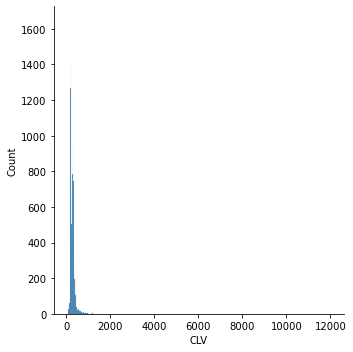

In [105]:
#sns.lineplot(data=rfm,x='recency', y='CLV')
sns.displot(data=rfm,x='CLV')


In [89]:
rfm.CLV.describe()

count    22022.000000
mean       300.187370
std        260.345082
min         34.393087
25%        212.016262
50%        277.899124
75%        325.245453
max      12004.974178
Name: CLV, dtype: float64

Trying out a chart with dates:

In [76]:
df[df['E-mail'] == 	'009g57nc9rg76dy@marketplace.amazon.de']

,Customer_ID,Order,Order_ID,Status,Payment,ValueNOVAT,E-mail,Firstname,Lastname,Product_title,...,First_Order,First_Order_YM,Creation_Date_YM,Customer_Type,Payment_Type,Year,Week,Year_Week,Duck,DaysDiff
3453,95223153,DE_ORD69721,178148608,"Paid, shipped",Payment Amazon,47.33,009g57nc9rg76dy@marketplace.amazon.de,Mercedes,Macholdt,WOOOF High Energy,...,2021-03-04,2021-03,2021-03,New,Amazon,2021,9,2021-09,No Duck,0.0


In [24]:
rfm2 = df.groupby('E-mail').agg({'Creation_Date': lambda x: (max_date - x.max()).days,
                                                   'Order_ID': lambda num: len(num),
                                                   'ValueNOVAT': lambda price: price.mean(), 'Creation_Date_YM': lambda x: x.max()})

In [25]:
# Reset Index
rfm2.reset_index(inplace=True)

# Change the name of the columns
rfm2.columns=['email','recency','frequency','monetary_value', 'year_month']

In [92]:
rfm2

,email,recency,frequency,monetary_value,year_month
0,003ppcs4s2vcj0q@marketplace.amazon.de,651,3,40.150000,2019-06
1,009g57nc9rg76dy@marketplace.amazon.de,12,10,45.704000,2021-03
2,00j89nxrhbft07k@marketplace.amazon.de,977,1,44.810000,2018-07
3,00jx5l3sntnj5p1@marketplace.amazon.de,764,1,23.830000,2019-02
4,00sk0ls66hd2c5x@marketplace.amazon.de,875,2,27.050000,2018-10
...,...,...,...,...,...
22017,zzmgl1s1l04mzws@marketplace.amazon.de,770,3,24.593333,2019-02
22018,zzrnnjbmtkz3fzg@marketplace.amazon.de,349,1,52.480000,2020-04
22019,zztrh549mbsn9x9@marketplace.amazon.de,512,1,29.860000,2019-10
22020,zzxb9d6c071ws6z@marketplace.amazon.de,333,1,45.190000,2020-04


In [93]:
rfm2.year_month.unique()

array(['2019-06', '2021-03', '2018-07', '2019-02', '2018-10', '2020-12',
       '2020-06', '2020-07', '2018-08', '2019-08', '2019-07', '2018-06',
       '2021-02', '2020-08', '2018-04', '2019-05', '2020-01', '2020-04',
       '2021-01', '2018-11', '2020-05', '2017-12', '2019-10', '2020-09',
       '2019-09', '2018-01', '2019-11', '2019-03', '2018-03', '2020-03',
       '2019-01', '2019-04', '2020-02', '2018-02', '2020-11', '2020-10',
       '2018-09', '2019-12', '2018-12', '2018-05', '2017-11'],
      dtype=object)

In [94]:
print(df.groupby('E-mail'))

<AxesSubplot:>

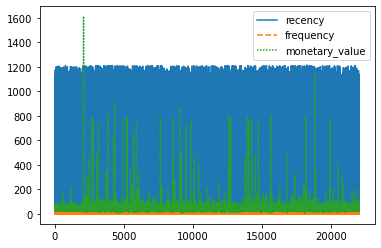

In [95]:
sns.lineplot(data=rfm2)


## Crazy charts
From this page: https://towardsdatascience.com/data-driven-growth-with-python-part-3-customer-lifetime-value-prediction-6017802f2e0f

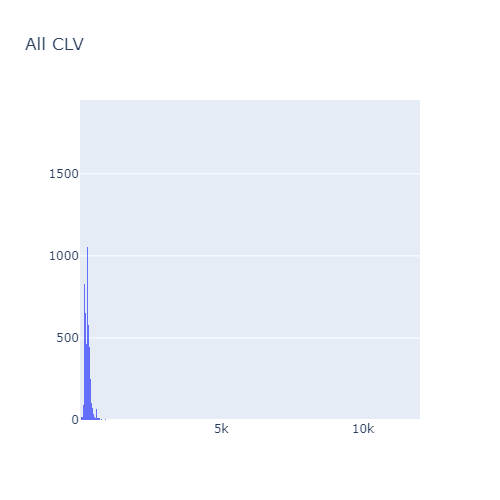

In [96]:
#plot LTV histogram
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "png"

###
plot_data = [
    go.Histogram(
        x=rfm['CLV']
    )
]

plot_layout = go.Layout(
        title='All CLV'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [26]:
from sklearn.cluster import KMeans

#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [27]:
rfm2= rfm.copy()
rfm2.head()

,email,recency,frequency,monetary_value,CLV
0,003ppcs4s2vcj0q@marketplace.amazon.de,651,3,40.150,298.892308
1,009g57nc9rg76dy@marketplace.amazon.de,12,10,45.704,340.238457
2,00j89nxrhbft07k@marketplace.amazon.de,977,1,44.810,333.583171
3,00jx5l3sntnj5p1@marketplace.amazon.de,764,1,23.830,177.399843
4,00sk0ls66hd2c5x@marketplace.amazon.de,875,2,27.050,201.370783


In [29]:
rfm.describe()

,recency,frequency,monetary_value,CLV
count,22022.000000,22022.000000,22022.000000,22022.000000
mean,457.017483,3.528835,45.456334,338.394732
std,361.334113,5.220488,41.727883,310.638687
min,0.000000,1.000000,4.620000,34.393087
25%,109.000000,1.000000,29.400000,218.865102
50%,390.000000,2.000000,40.550417,301.873166
75%,777.000000,4.000000,48.450000,360.680755
max,1215.000000,103.000000,1689.740000,12579.085629


In [30]:
# Recency clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm2[['recency']])
rfm2['RecencyCluster'] = kmeans.predict(rfm2[['recency']])

rfm2 = order_cluster('RecencyCluster', 'recency',rfm2,False)


In [31]:
# Frequency clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm2[['frequency']])
rfm2['frequencyCluster'] = kmeans.predict(rfm2[['frequency']])
rfm2 = order_cluster('frequencyCluster', 'frequency',rfm2,True)


In [32]:
# CLV clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm2[['CLV']])
rfm2['CLV_cluster'] = kmeans.predict(rfm2[['CLV']])
rfm2 = order_cluster('CLV_cluster', 'CLV',rfm2,True)


In [33]:
#overall scoring
rfm2['OverallScore'] = rfm2['RecencyCluster'] + rfm2['frequencyCluster'] + rfm2['CLV_cluster']
rfm2['Segment'] = 'Low-Value'
rfm2.loc[rfm2['OverallScore']>2,'Segment'] = 'Mid-Value' 
rfm2.loc[rfm2['OverallScore']>4,'Segment'] = 'High-Value' 


In [34]:
plot_data = [
    go.Scatter(
        x=rfm2.query("Segment == 'Low-Value'")['OverallScore'],
        y=rfm2.query("Segment == 'Low-Value'")['CLV'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=rfm2.query("Segment == 'Mid-Value'")['OverallScore'],
        y=rfm2.query("Segment == 'Mid-Value'")['CLV'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=rfm2.query("Segment == 'High-Value'")['OverallScore'],
        y=rfm2.query("Segment == 'High-Value'")['CLV'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "CLV"},
        xaxis= {'title': "RFM Score"},
        title='CLV'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [35]:
# Positive correlation is quite visible here. High RFM score means high LTV.

In [37]:
rfm2.head()


,email,recency,frequency,monetary_value,CLV,RecencyCluster,frequencyCluster,CLV_cluster,OverallScore,Segment
0,003ppcs4s2vcj0q@marketplace.amazon.de,651,3,40.15,298.892308,1,0,0,1,Low-Value
1,00jx5l3sntnj5p1@marketplace.amazon.de,764,1,23.83,177.399843,1,0,0,1,Low-Value
2,00sk0ls66hd2c5x@marketplace.amazon.de,875,2,27.05,201.370783,1,0,0,1,Low-Value
3,00w4f6c1l0dr8wr@marketplace.amazon.de,769,1,35.93,267.476977,1,0,0,1,Low-Value
4,017629103959@o2online.de,603,1,26.12,194.447499,1,0,0,1,Low-Value


In [38]:
rfm2.OverallScore.unique()

array([1, 2, 3, 0, 4, 5, 6, 7], dtype=int64)

In [ ]:
rfm2.RecencyCluster.unique()

## Experiments

In [ ]:
# Recency clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm2[['recency']])
rfm2['RecencyCluster'] = kmeans.predict(rfm2[['recency']])

rfm2 = order_cluster('RecencyCluster', 'recency',rfm2,False)

In [48]:
#RECENCY
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 12)
X = rfm2[['recency']]

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [49]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 314.48446594724646
2 : 148.15209571029536
3 : 94.13476288295935
4 : 72.04705330952069
5 : 56.190518680120114
6 : 47.66763351743251
7 : 39.67712755261599
8 : 34.91625236990963
9 : 30.61310313862314
10 : 27.542559390268025
11 : 25.31971160375928


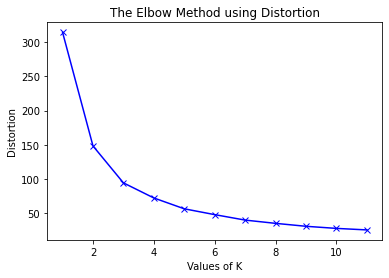

In [50]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [51]:
distortions = []
mapping1 = {}
K = range(1, 12)
X = rfm2[['frequency']]

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]

In [52]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.0344906536244443
2 : 1.848625013696558
3 : 1.403259949832398
4 : 1.1522536662912457
5 : 0.9691700888889011
6 : 0.7157283706675709
7 : 0.6889536276557573
8 : 0.611041881908812
9 : 0.3851294612076717
10 : 0.4048116492231125
11 : 0.3556017908754196


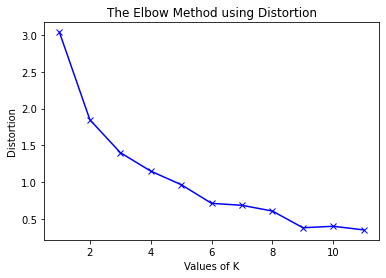

In [53]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [63]:
rfm2.frequency.value_counts().to_frame()[:10]

,frequency
1,10439
2,3919
3,1934
4,1253
5,796
6,645
7,480
8,404
9,325
10,273


In [64]:
rfm2.frequency.max()

103

In [74]:
 rfm.quantile([.05, .1, .25, .50, .75, .85, .90, .95], axis=0)

,recency,frequency,monetary_value,CLV
0.05,14.0,1.0,26.120000,194.447499
0.10,31.0,1.0,26.590000,197.946363
0.25,109.0,1.0,29.400000,218.865102
0.50,390.0,2.0,40.550417,301.873166
0.75,777.0,4.0,48.450000,360.680755
0.85,898.0,6.0,56.312500,419.212281
0.90,982.0,8.0,62.100000,462.296695
0.95,1103.0,13.0,82.150000,611.556739


In [69]:
rfm.describe()

,recency,frequency,monetary_value,CLV
count,22022.000000,22022.000000,22022.000000,22022.000000
mean,457.017483,3.528835,45.456334,338.394732
std,361.334113,5.220488,41.727883,310.638687
min,0.000000,1.000000,4.620000,34.393087
25%,109.000000,1.000000,29.400000,218.865102
50%,390.000000,2.000000,40.550417,301.873166
75%,777.000000,4.000000,48.450000,360.680755
max,1215.000000,103.000000,1689.740000,12579.085629
